### Excersise 1

• the number of particles emitted by a radioactive source during a fixed interval of time (∆t =
10 s) follows a Poisson distribution on the parameter µ. The number of particles observed during
consecutive time intervals is: 4, 1, 3, 1 and 3<br>

(a) suppose a uniform prior distribution for the parameter µ <br>
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

(b) suppose a Jeffrey’s prior for the parameter µ<br>
- determine and draw the posterior distribution for µ, given the data
- evaluate mean, median and variance, both analytically and numerically in R

(c) evaluate a 95% credibility interval for the results obtained with both priors. Compare the result
with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation


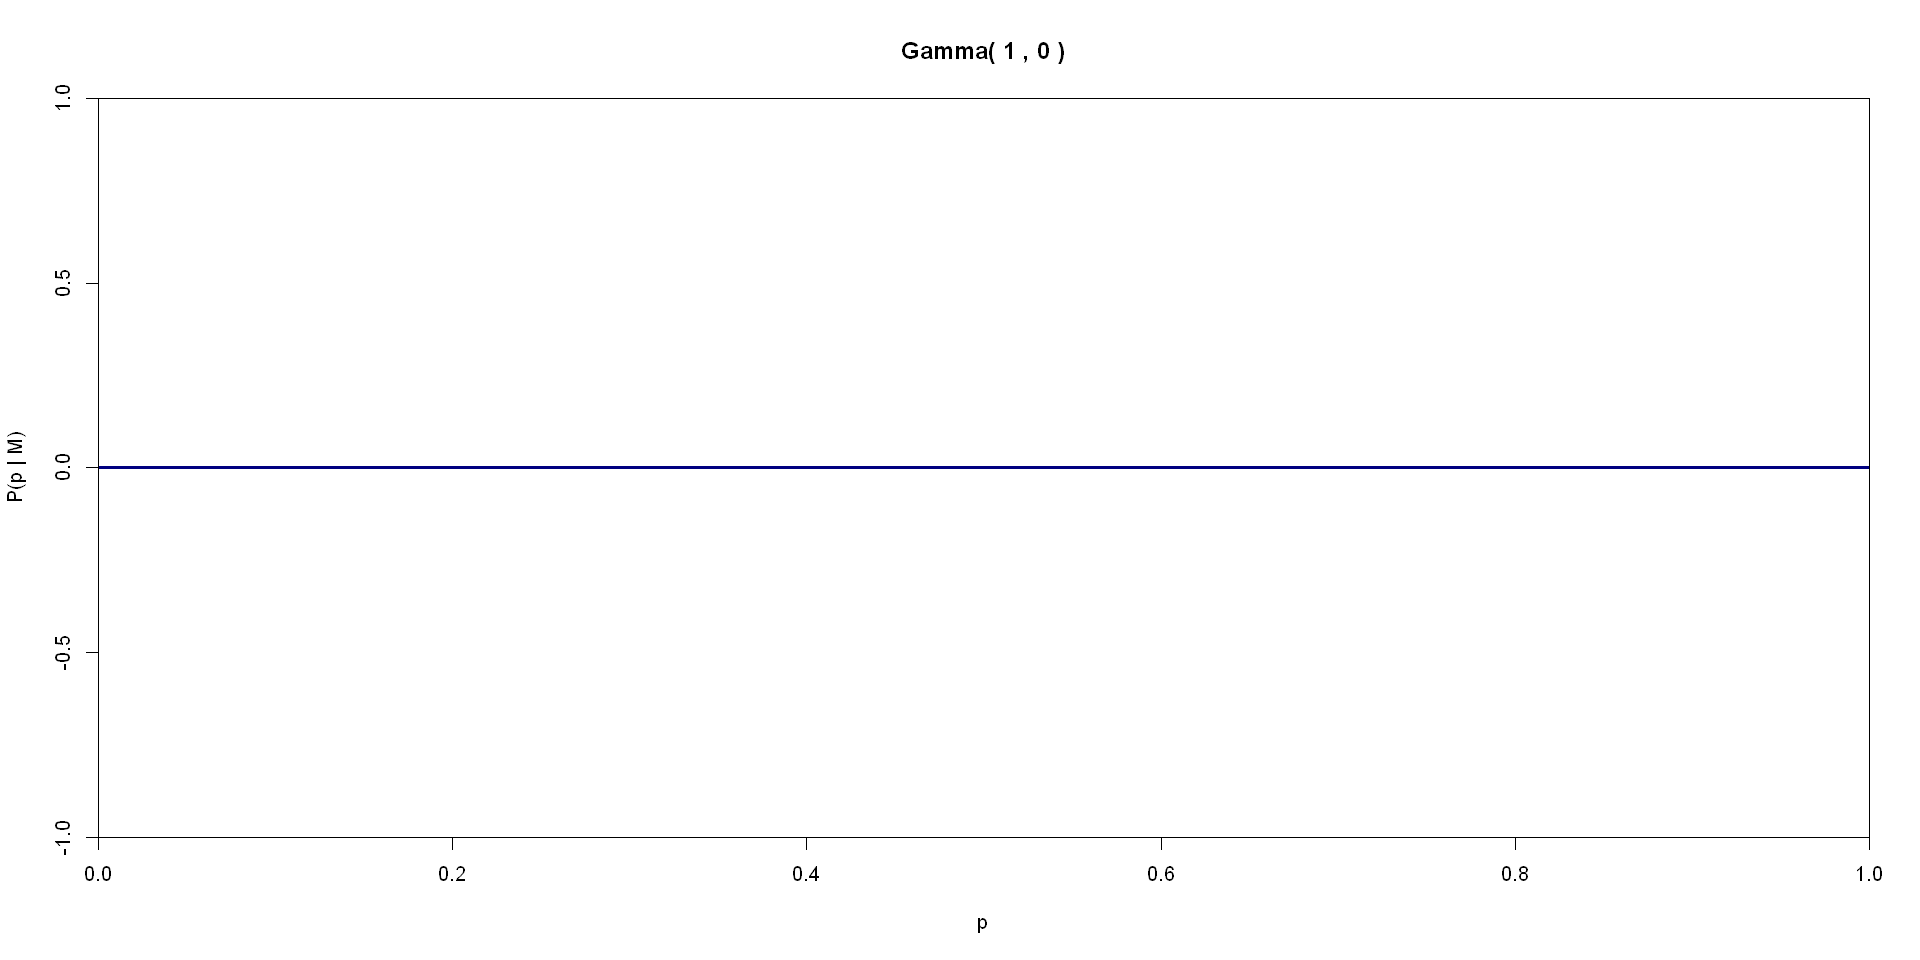

In [117]:
## We generate our uniform prior
p <- seq(0, 1, length.out = 201)
p.prior <- dgamma(p, 1 ,0)
plot(p, p.prior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
xlab="p", ylab=paste("P(p | M)"),
main=paste("Gamma(",1 ,",",0 ,")"))

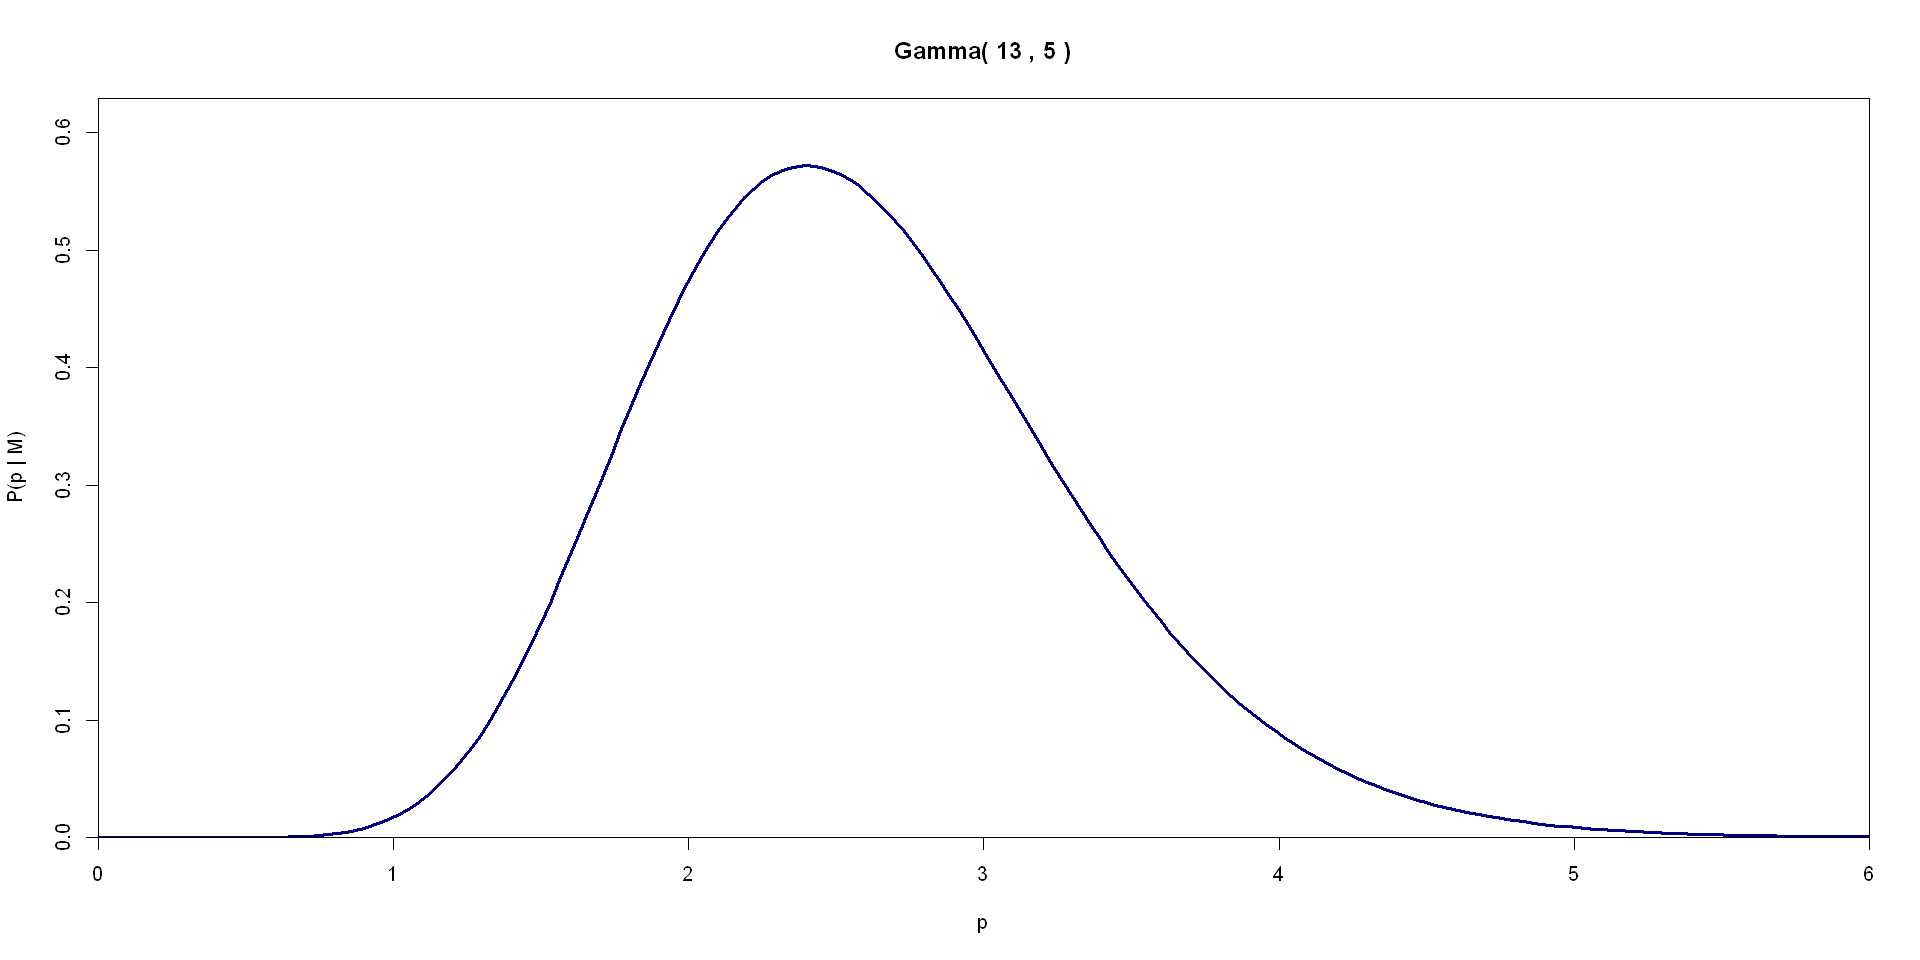

In [118]:
#As the material indicates, the posterior it’s a Gamma function with alpha = sum(y) + 1 and gamma = n
y<- c(4, 1, 3, 1,3)
n <- length(y)


alpha <- sum(y)+1
gamma <- n
p <- seq(0, 6, length.out = 201)
p.posterior <- dgamma(p, alpha,gamma)
plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,6),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Gamma(",alpha ,",",gamma ,")"))

In [119]:
## Lets make a function to output all the interesting features of our gamma distribution

gamma_interesting <- function(alpha,gamma){
    conf <- 0.05
    dist = rgamma(n=10000, alpha,gamma)
    expec <- weighted.mean(dist)
    media <- median(dist)
    mode  <- unique(dist)[which.max(tabulate(match(dist, unique(dist))))]
    stn   <- sd(dist)
    q_lower <- qgamma(conf / 2, alpha , gamma)
    q_upper <- qgamma(1 - conf / 2, alpha , gamma)
    return(list(expec,media,mode,stn,q_lower,q_upper))    
    
    
    
}




In [120]:
#Now we can append the interesting features to our initial parameters

results <- data.frame(matrix(ncol = 9, nrow = 0))

colnames(results) <- c("Prior","Alpha", "Gamma", "Mean","Median", "Mode","Standard Deviation","Min Confidence","Max Confidence")
results[1,] <- append(list("Uniform",alpha,gamma),gamma_interesting(alpha,gamma))
results

,Prior,Alpha,Gamma,Mean,Median,Mode,Standard Deviation,Min Confidence,Max Confidence
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,13,5,2.601235,2.540401,2.107564,0.7281864,1.38439,4.192317


,Prior,Alpha,Gamma,Mean,Median,Mode,Standard Deviation,Min Confidence,Max Confidence
,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Uniform,13.0,5,2.601235,2.540401,2.107564,0.7281864,1.384390,4.192317
2,Jeffrey,12.5,5,2.498408,2.440799,1.719914,0.7052538,1.311972,4.064647


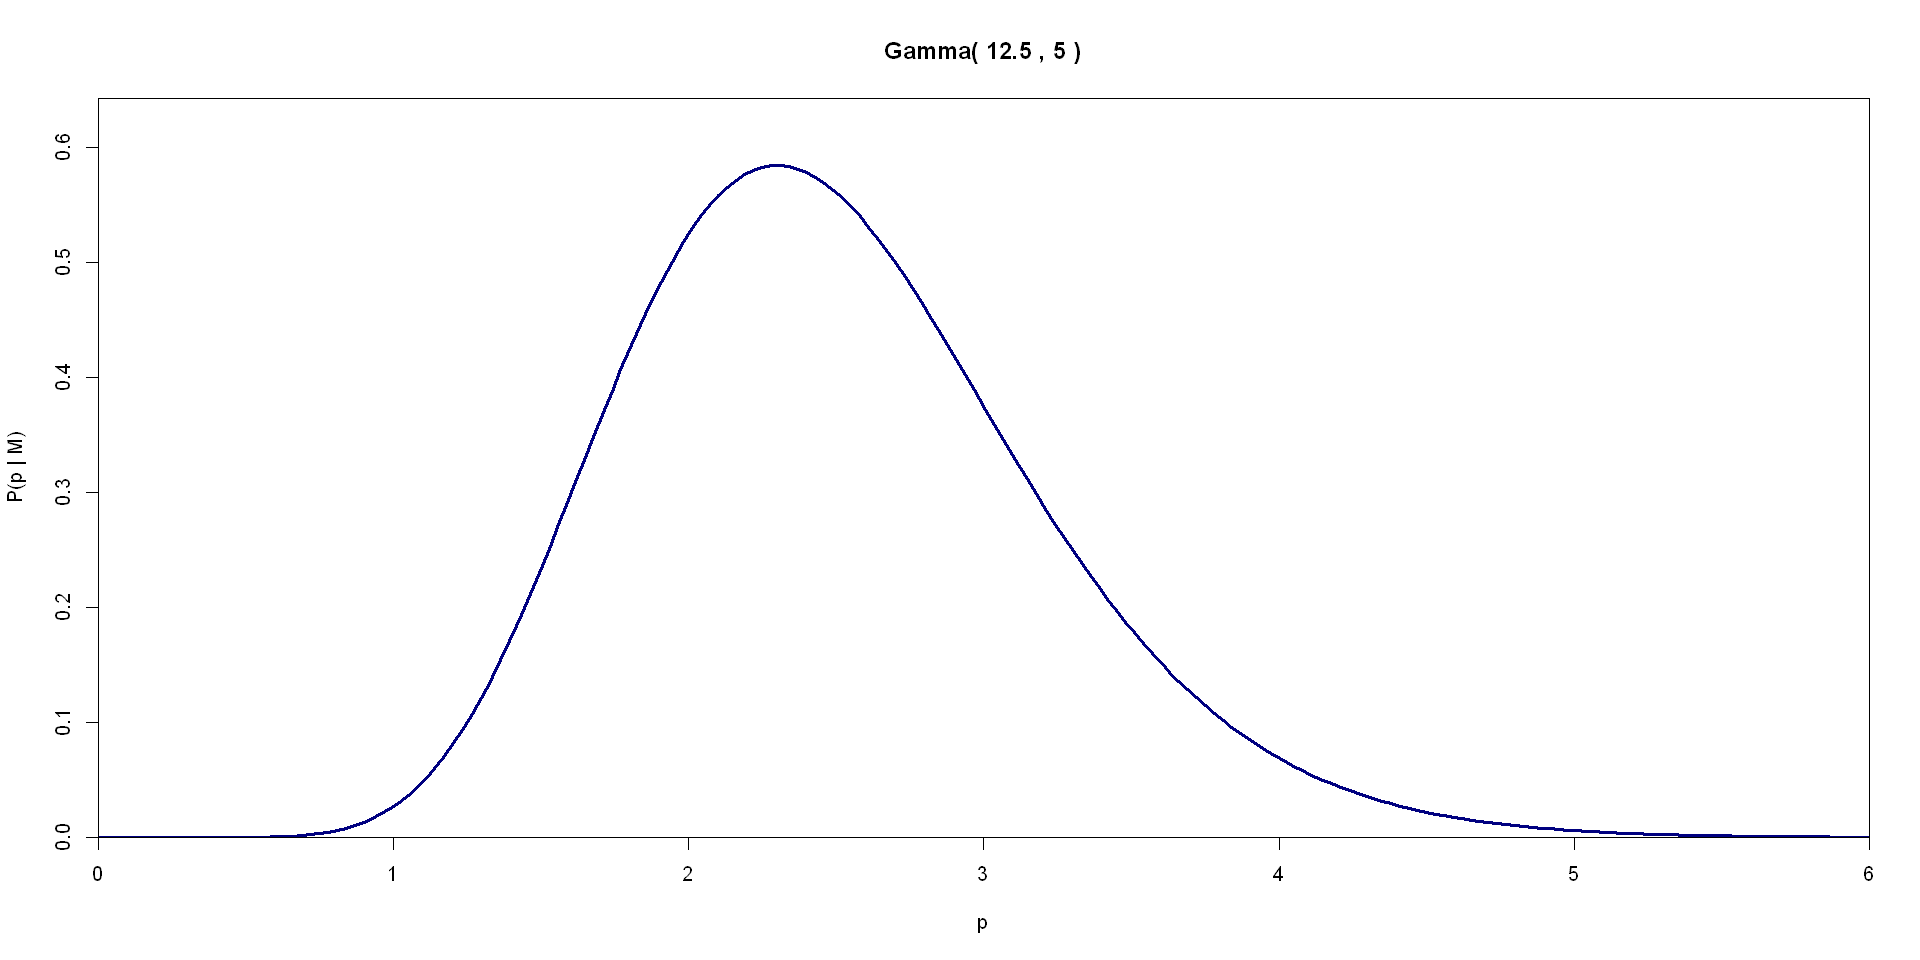

In [121]:
## Now lets work with Jeffrey's Prior
p <- seq(0, 20, length.out = 2001)
p.prior <- dgamma(p, 1/2 ,0)

#As the material indicates, the posterior it’s a Gamma function with alpha = sum(y) + 1/2 and gamma = n
y<- c(4, 1, 3, 1,3)
n <- length(y)

alpha <- sum(y)+1/2
gamma <- n
p <- seq(0, 6, length.out = 201)
p.posterior <- dgamma(p, alpha,gamma)
plot(p, p.posterior , xaxs="i", yaxs="i",
col="navy", type="l", lty=1, lwd = 3,
ylim = c(0,max(p.posterior)*1.1),
xlim = c(0,6),
xlab="p", ylab=paste("P(p | M)"),
main=paste("Gamma(",alpha ,",",gamma ,")"))


results[2,] <- append(list("Jeffrey",alpha,gamma),gamma_interesting(alpha,gamma))




results

### The Lighthouse Problem

given the problem of the lightouse discussed last week, study the case in which both the position
along the shore (α) and the distance out at sea (β) are unknown

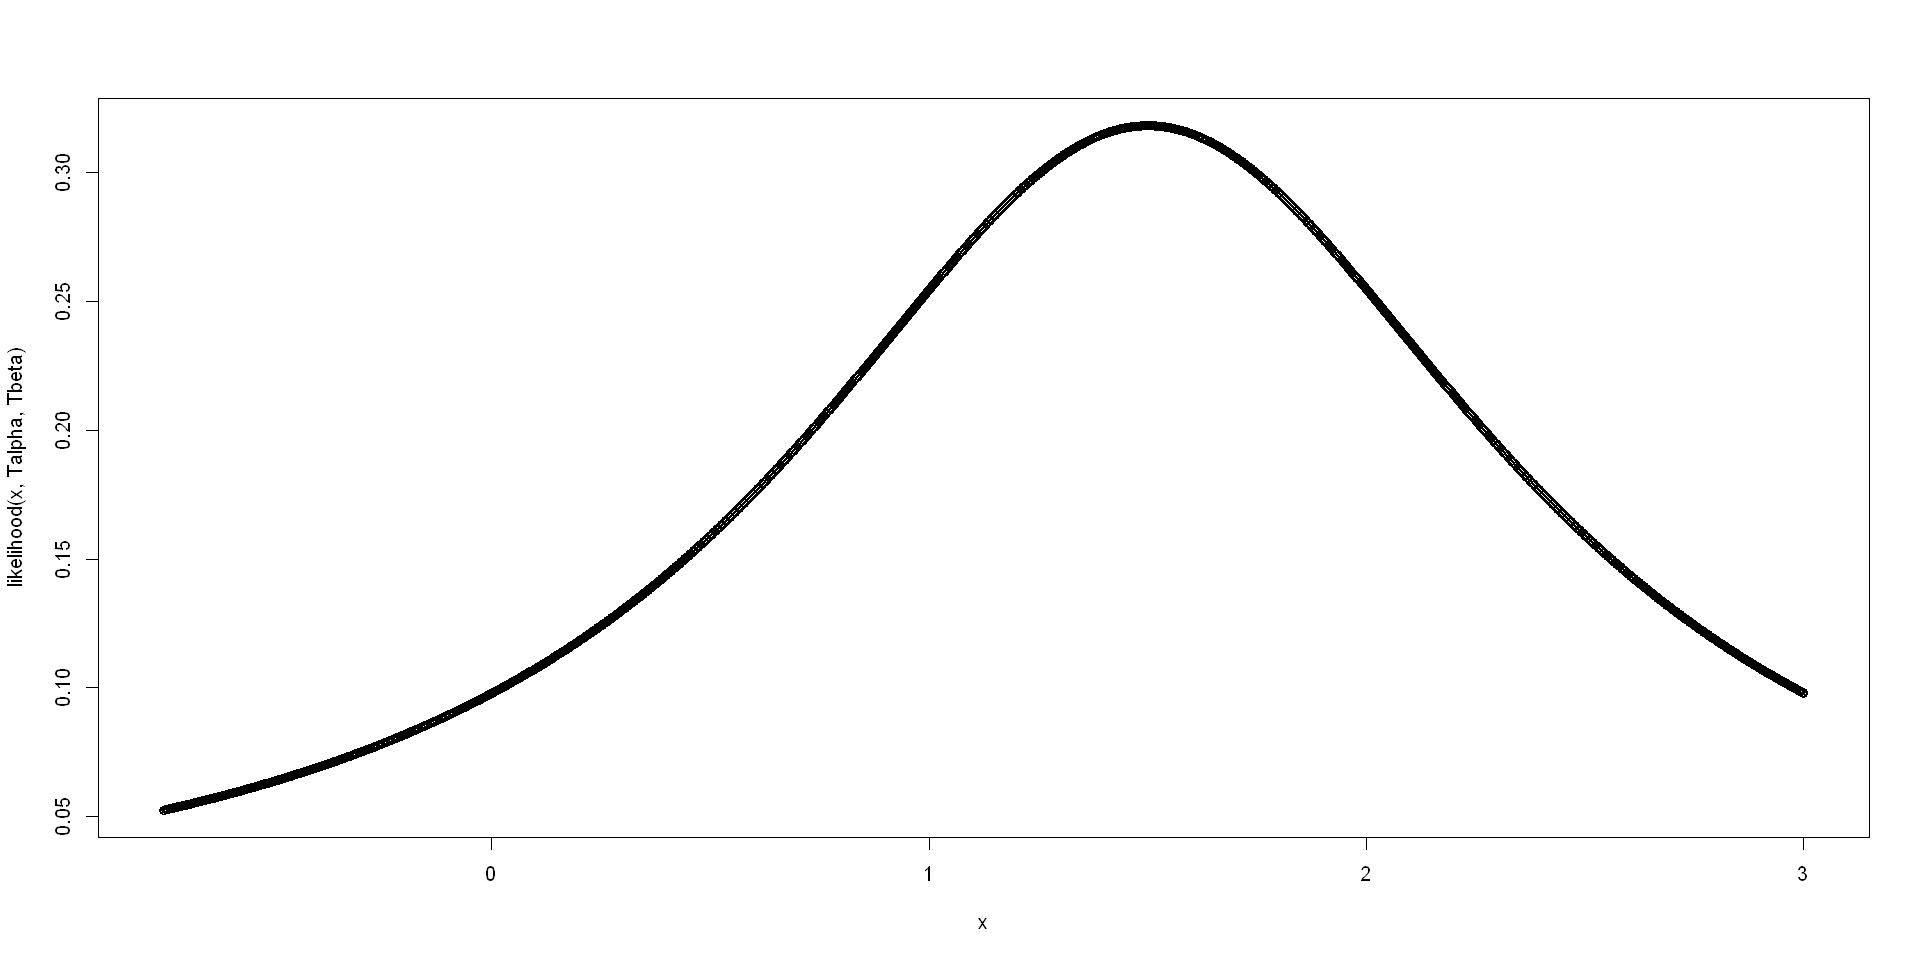

In [60]:
##Lets try to replicate some of the code and equations seen in class and work from there 

#Likelihood:
 likelihood <-  function(x, alpha, beta){
    return (beta / (pi * (beta ** 2 + (x - alpha) ** 2)))
 }

#We assume alpha = 1.5km and beta = 1km so:
Talpha <- 1.5
Tbeta <- 1

#And we plot how x looks in the interval -2km and 2km

x <- seq(-Talpha*0.5,Talpha*2, length.out = 2000)
plot(x,likelihood(x,Talpha,Tbeta))

In [71]:
## As suggested, we start by calculating the logarithm of the posterior and then taking the exponential

p.log.like <- function(a,b, data) {
#We change it so we can calculate a or b
logL <- 0.0
for (x in data) {
logL <- logL - log(1 + ((x-a)/b)**2)
}
return(logL)
}

log.post <- function(a,b, data) {
    return(sum( log( (b/pi)/(b^2 + (data-a)^2) ) ))
 

}
vlog.post <- Vectorize(log.post)

In [95]:
## We make this part a function where the inputs are True Alpha, True Beta and number of samples
generate_grid <- function(Talpha,Tbeta,n,cplot=TRUE){
    
## Generate some points using the likelihood distribution 

x <- rcauchy(n, Talpha, Tbeta)

## We get the grid of alphas and betas
resolution<- 0.01
alpha <- seq(-5, 5, resolution)
beta <- seq(0, 5,resolution)
## As we expect the plot to peak at (1,1) then this grid is reasonable
probe_values <- matrix(nrow=length(alpha), ncol=length(beta))

##Tried Vectorizing but we need a matrix as output so we are back to looping

for(i in 1:length(alpha)){
    
        for(j in 1:length(beta)){
        
                                probe_values[i,j] <- log.post(alpha[i], beta[j],x)
                                }
        
                        }
    
##Now lets get the real values as seen in the slides    
probe_values <- probe_values-max(probe_values)
probe_values <- exp(probe_values)
    
## Lets get the point with the highest probability
    
max_index <- which(probe_values == max(probe_values), arr.ind = TRUE)
    
#Lets now try a Contour Plot, A 3D plot was tried but it took too long to run and didnt visualized important information
if(cplot == TRUE){
    contour(alpha, beta, probe_values, xlim=c(0,2), ylim=c(0,2), xlab=bquote(Alpha), ylab=bquote(Beta))
points(Talpha, Tbeta, pch=3, col="blue", lwd=2) # true value
legend("topright",c("true position"), col="blue", pch=3, pt.cex=1.2, pt.lwd=2)
}



return(c(alpha[max_index[1]],beta[max_index[2]]))
}








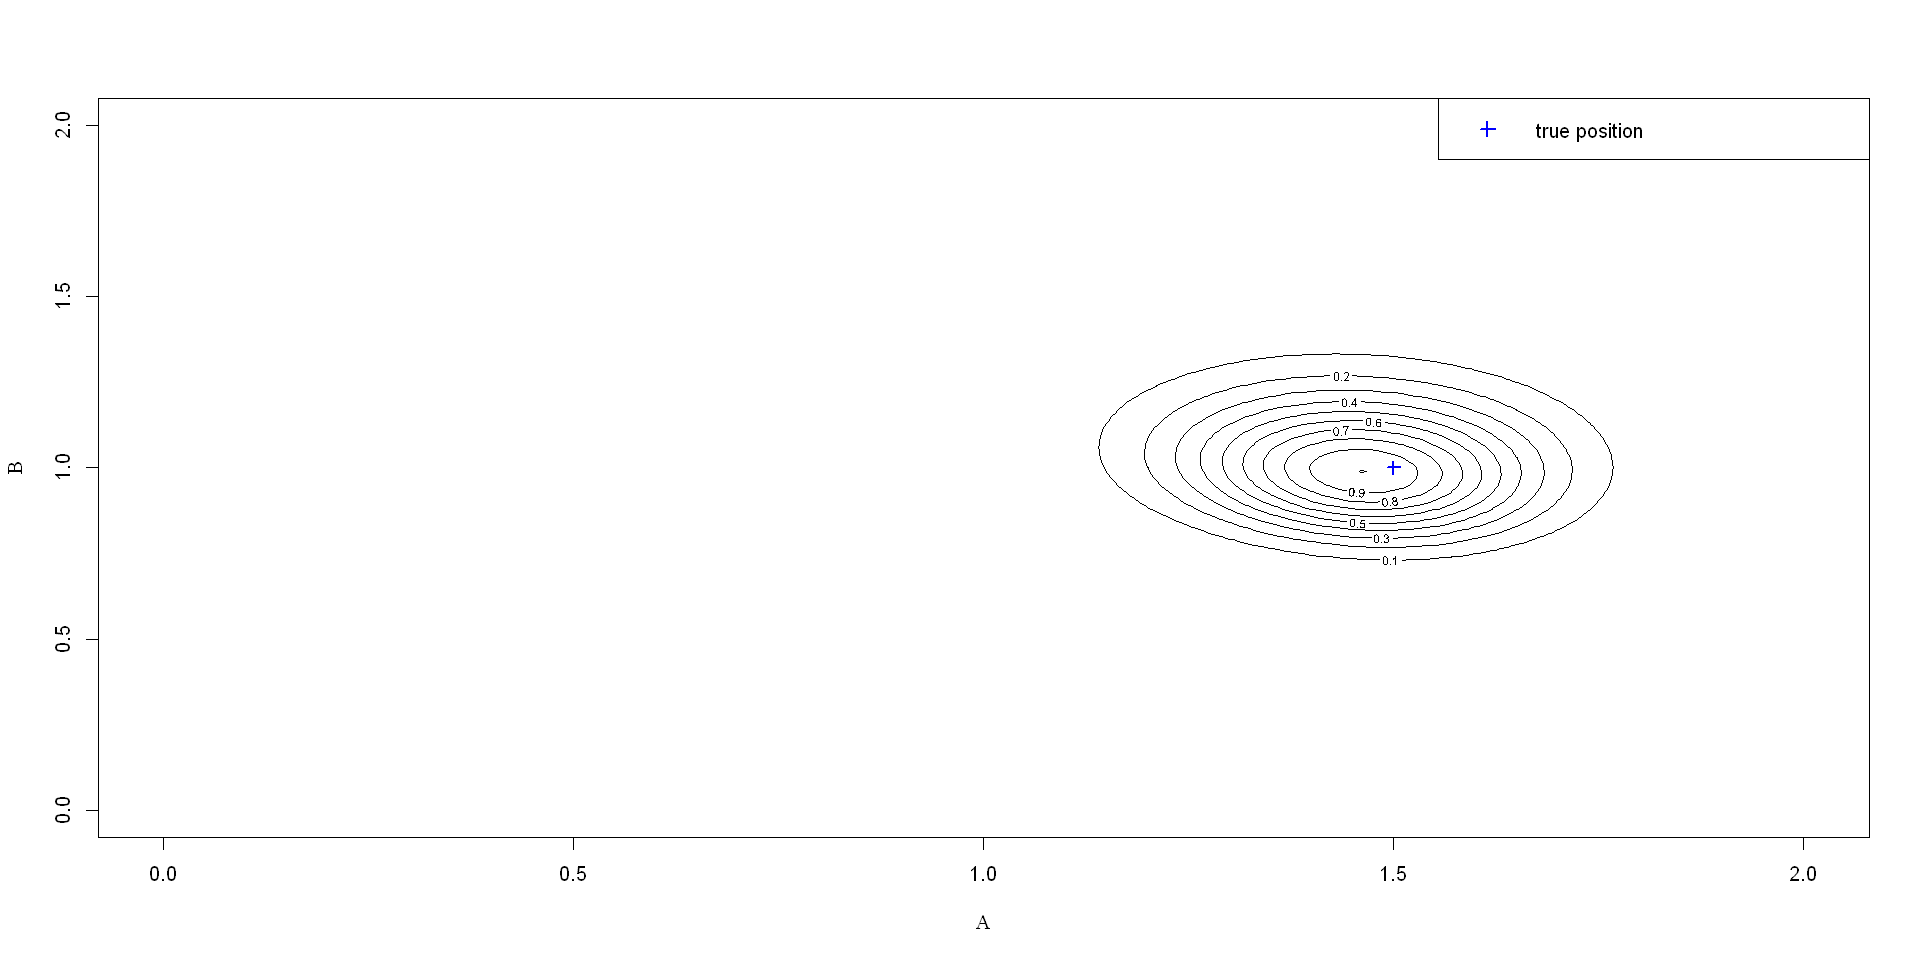

In [91]:
#Now we have a function that predicts the positison of the lighthouse while giving it the true position and the numbers
#And also plots if requested
predicted_position<- generate_grid(1.5,1,100,cplot=TRUE)


In [114]:
#To finish, lets create a dataset and fill it whith different data sample and their results
results <- data.frame(matrix(ncol = 6, nrow = 0))
colnames(results) <- c("Samples", "True A", "True B", "Predicted A","Predicted A", "Error")

attempts <- seq(1,100,by=1)
ind <-1
for (num in attempts){
    pred <- generate_grid(1,1,num,cplot=FALSE)
    sqre <- sqrt((1-pred[1])**2+(1-pred[2])**2 )
    results[ind,] <- list(num,1,1,pred[1],pred[2],sqre)
    ind <-1+ind
}

In [115]:
results

,Samples,True A,True B,Predicted A,Predicted A,Error
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,-5.00,2.15,6.10921435
2,2,1,1,-3.23,0.12,4.32056709
3,3,1,1,-1.38,0.67,2.40276924
4,4,1,1,0.96,0.38,0.62128898
5,5,1,1,-2.56,2.04,3.70880035
6,6,1,1,0.82,1.12,0.21633308
7,7,1,1,1.52,2.10,1.21671689
8,8,1,1,0.94,0.94,0.08485281
9,9,1,1,1.30,0.48,0.60033324


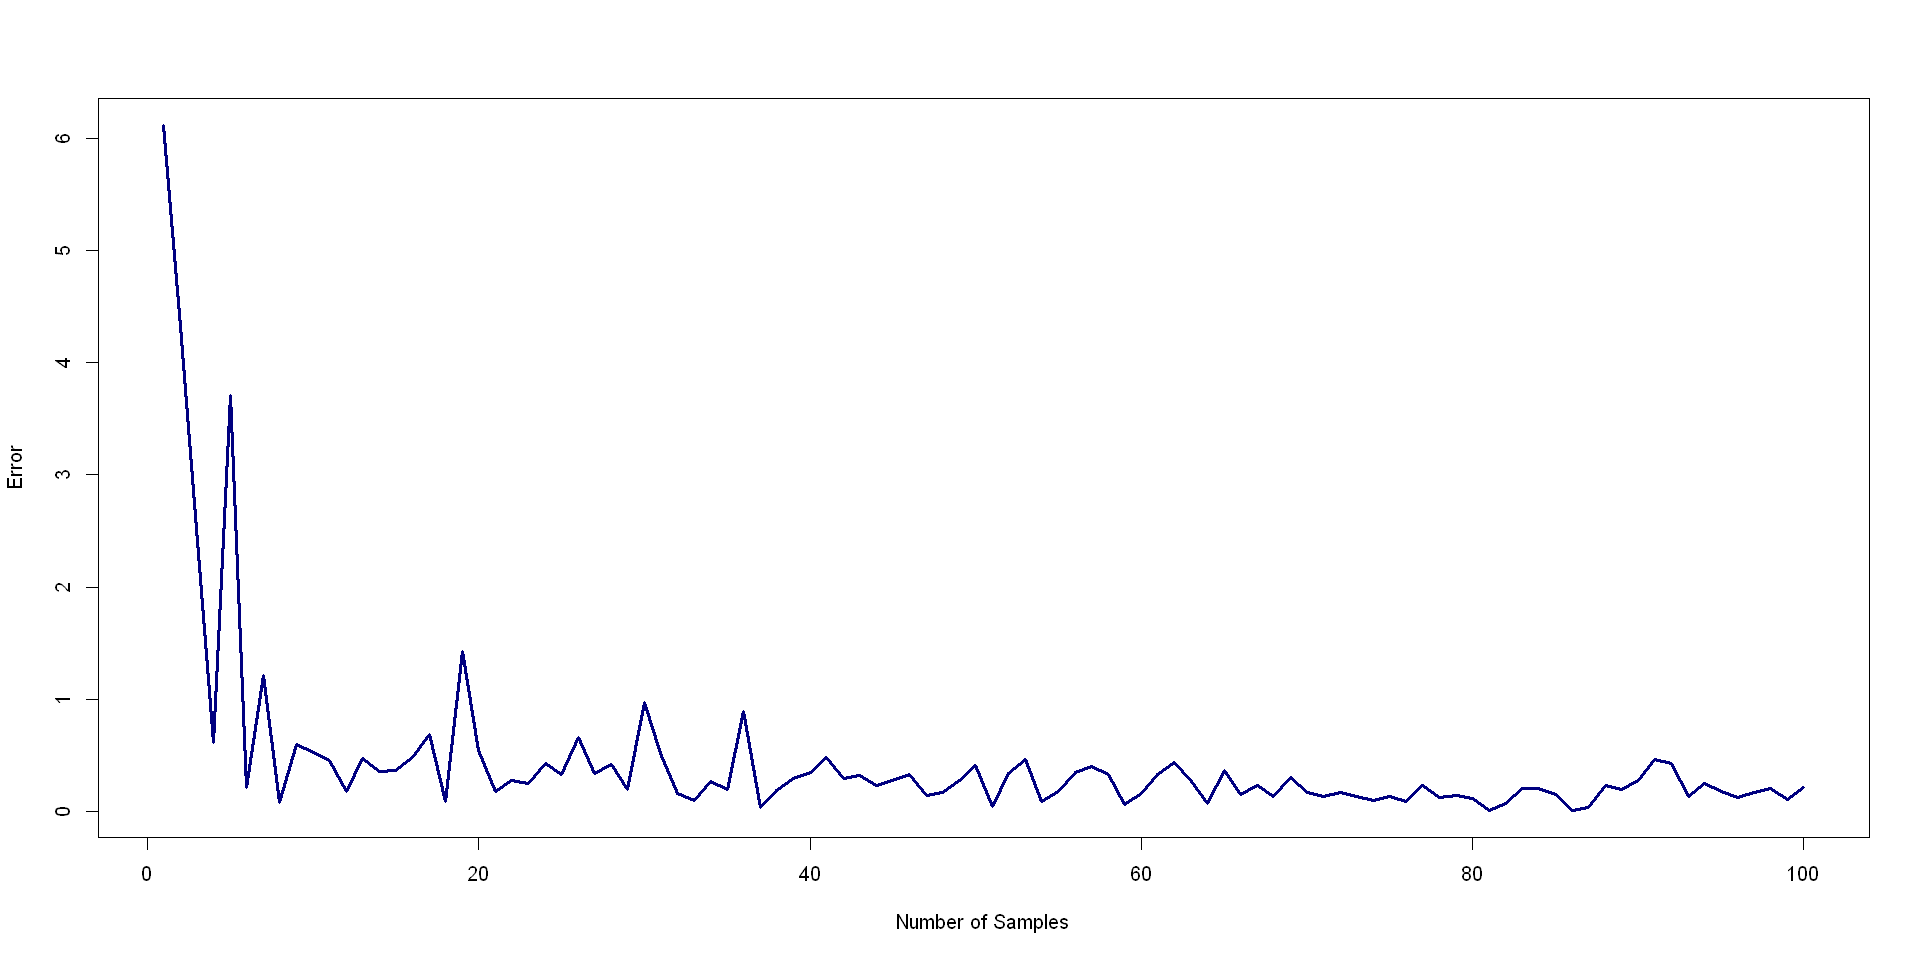

In [116]:
#We see that the error stabilizes and drops with the number of samples used
plot(results$Samples,results$Error,type="l",lwd =3,col = "navy",
     xlab="Number of Samples",
    ylab=expression(paste("Error")))

### Excersise 3: Signal over Background
given the Signal over Background example discussed last week, analyze and discuss the following
cases:

(a) vary the sampling resolution of used to generate the data, keeping the same sampling range xdat <- seq(from=-7*w, to=7*w, by=0.5*w)<br>
• change the resolution w = {0.1, 0.25, 1, 2, 3}<br>
• Check the effect on the results<br>

(b) change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)<br>
• Check the effect on the results<br>



In [64]:
## We need a family of functions so we can feed w and the ratio A/B
#Starting with the signal
signal <- function(x, a, b, x0, w, t) {
t * (a*exp(-(x-x0)**2/(2*w**2)) + b)
}

#Then a function to plot the bins and the distribution
binplots <- function(xdat,A.true,B.true,n,x0,w,Delta.t,res){
    
    
    s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
    ddat <- rpois(length(s.true), s.true)
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*w)
    splot <- signal(xplot , A.true , B.true , x0, w, Delta.t)
    plot(xplot , splot ,type='l', lwd=2,
    xlab="x", ylab="Signal+Background counts")
    par(new=TRUE)
    xdat.off <- xdat -0.25
    plot(xdat.off, ddat , type='s',col='firebrick3',
    lwd=2,xlim=range(xplot), ylim=range(c(splot , ddat )))
    
}



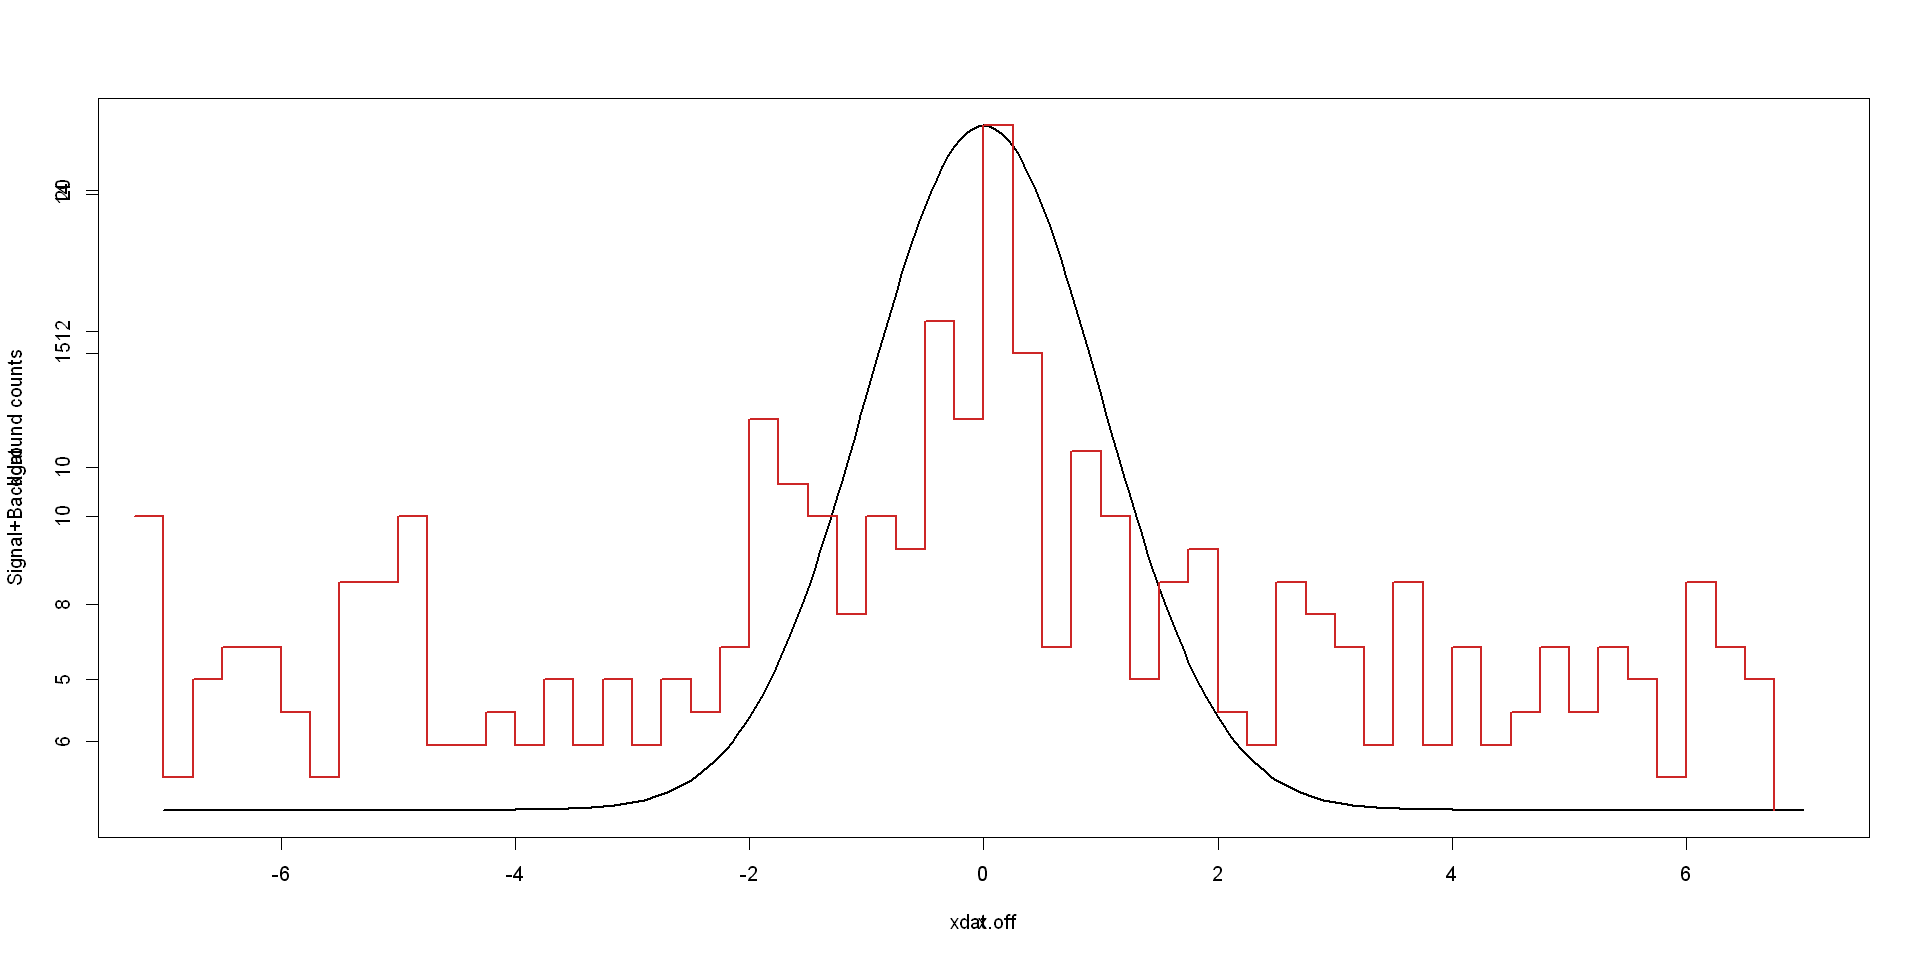

In [96]:
# - Generative model

# Define model parameters
x0 <- 0 # Signal peak
w <-1 # Signal width
## Dynamic resolution:part A
res <- 2

A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(205)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w*(1/res))
binplots(xdat,A.true,B.true,n,x0,w,Delta.t,res)
#We see that it works and we can just vary the res and get different results by calling this function

In [154]:
#Now lets get another for the contour plot

contourplot <- function(xdat,A.true,B.true,n,x0,w,Delta.t,res){
    # - Sampling grid for computing posterior
alim <- c(A.true*0.5, A.true*2)
blim <- c(B.true*0.75, B.true*1.5)
Nsamp <- 100
uniGrid <- seq(from=1/(2*Nsamp),
to=1-1/(2*Nsamp), by=1/Nsamp)
delta_a <- diff(alim )/ Nsamp
delta_b <- diff(blim )/ Nsamp
a <- alim[1] + diff(alim )* uniGrid
b <- blim[1] + diff(blim )* uniGrid
    
s.true <- signal(xdat , A.true , B.true , x0, w, Delta.t)
ddat <- rpois(length(s.true), s.true)
    
  # Log posterior
log.post <- function(d, x, a, b, x0, w, t) {
if(a<0 || b <0) {return(-Inf )} # the effect of the prior
sum(dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE))
}
# Compute log unnormalized posterior , z = ln Pˆ*(a,b|D), on a regular grid
z <- matrix(data=NA , nrow=length(a), ncol=length(b))
for(j in 1:length(a)) {
for(k in 1:length(b)) {
z[j,k] <- log.post(ddat , xdat , a[j], b[k], x0, w, Delta.t)
}
}
z <- z - max(z) # set maximum to zero
# Plot unnormalized 2D posterior as contours.
contour(a, b, exp(z),
nlevels = 5,
labcex = 0.5,
lwd = 2,
xlab="amplitude , A",
ylab="background , B")
abline(v=2,h=1,col="grey")  
    
}



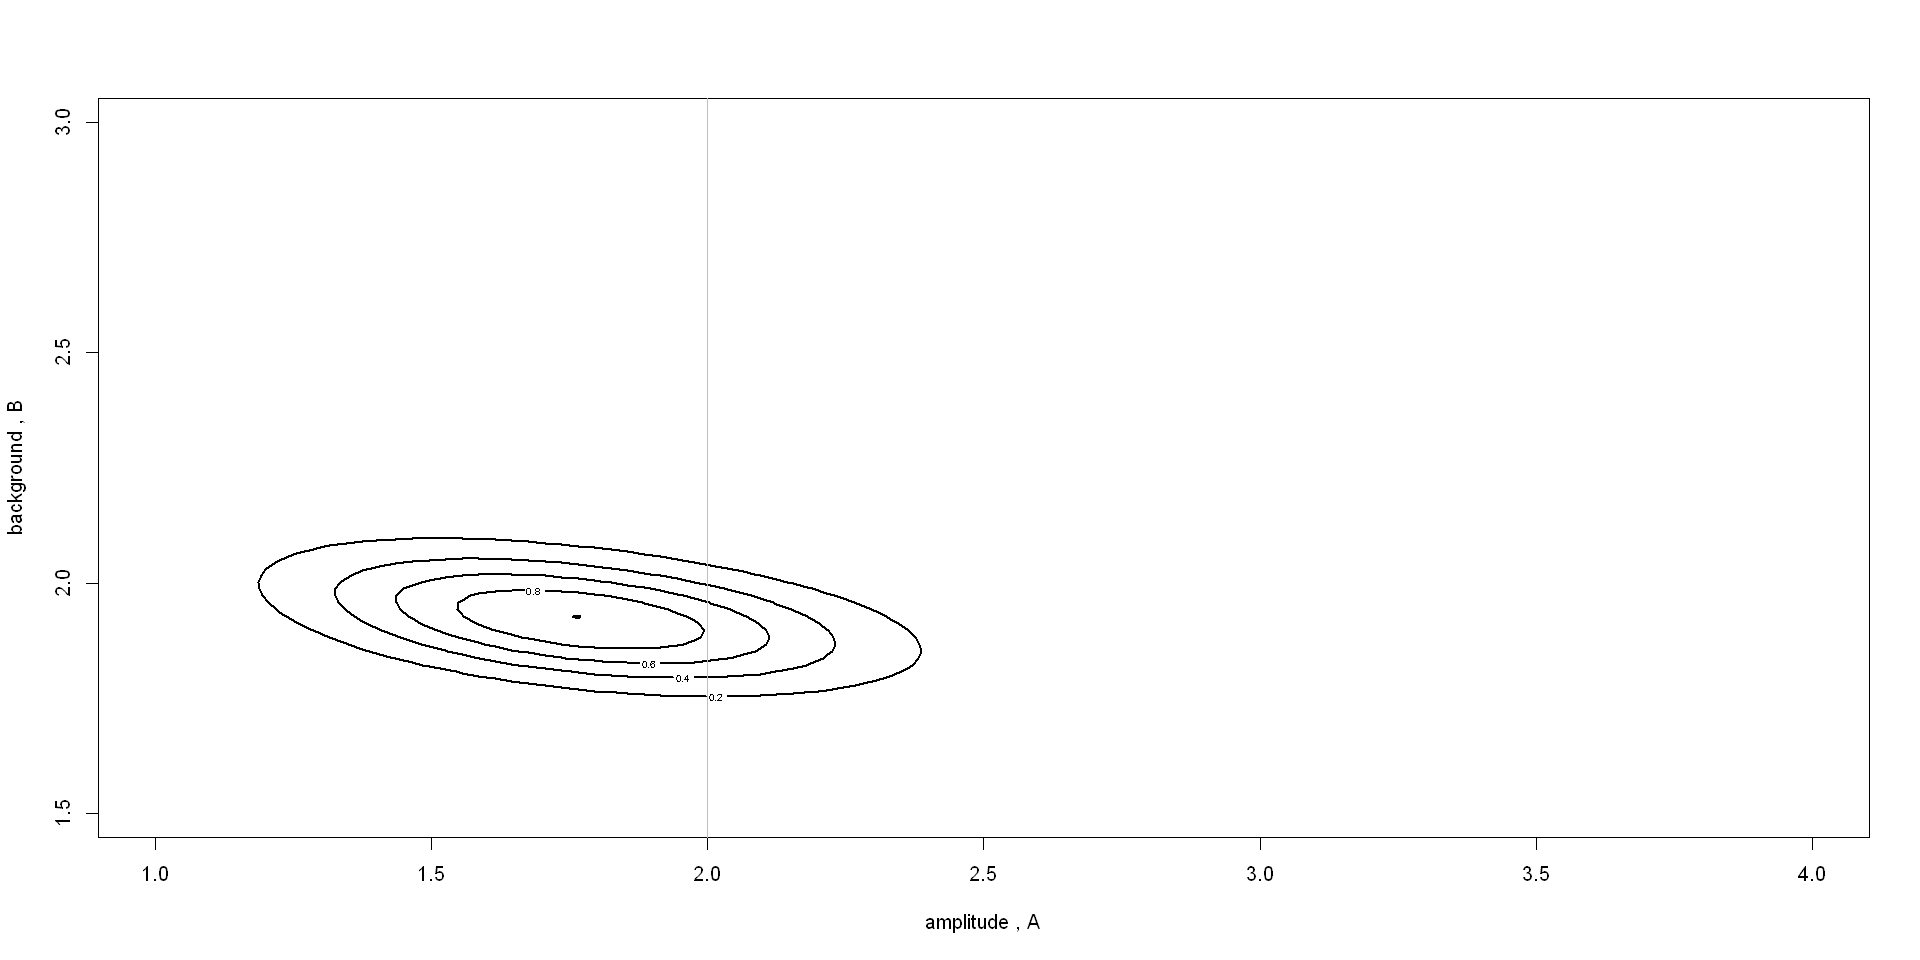

In [159]:
options(repr.plot.width=16, repr.plot.height=8)
xdat <- seq(from=-7*w, to=7*w, by=0.5*w*(1/2))
contourplot(xdat,2,2,n,x0,w,Delta.t,2)
#We check that this also works, meaning we can combine the two to solve part A

## Part A results

We can see that as the resolution increases, we get better and better results pinpointing the actual values of the background and the Signal.

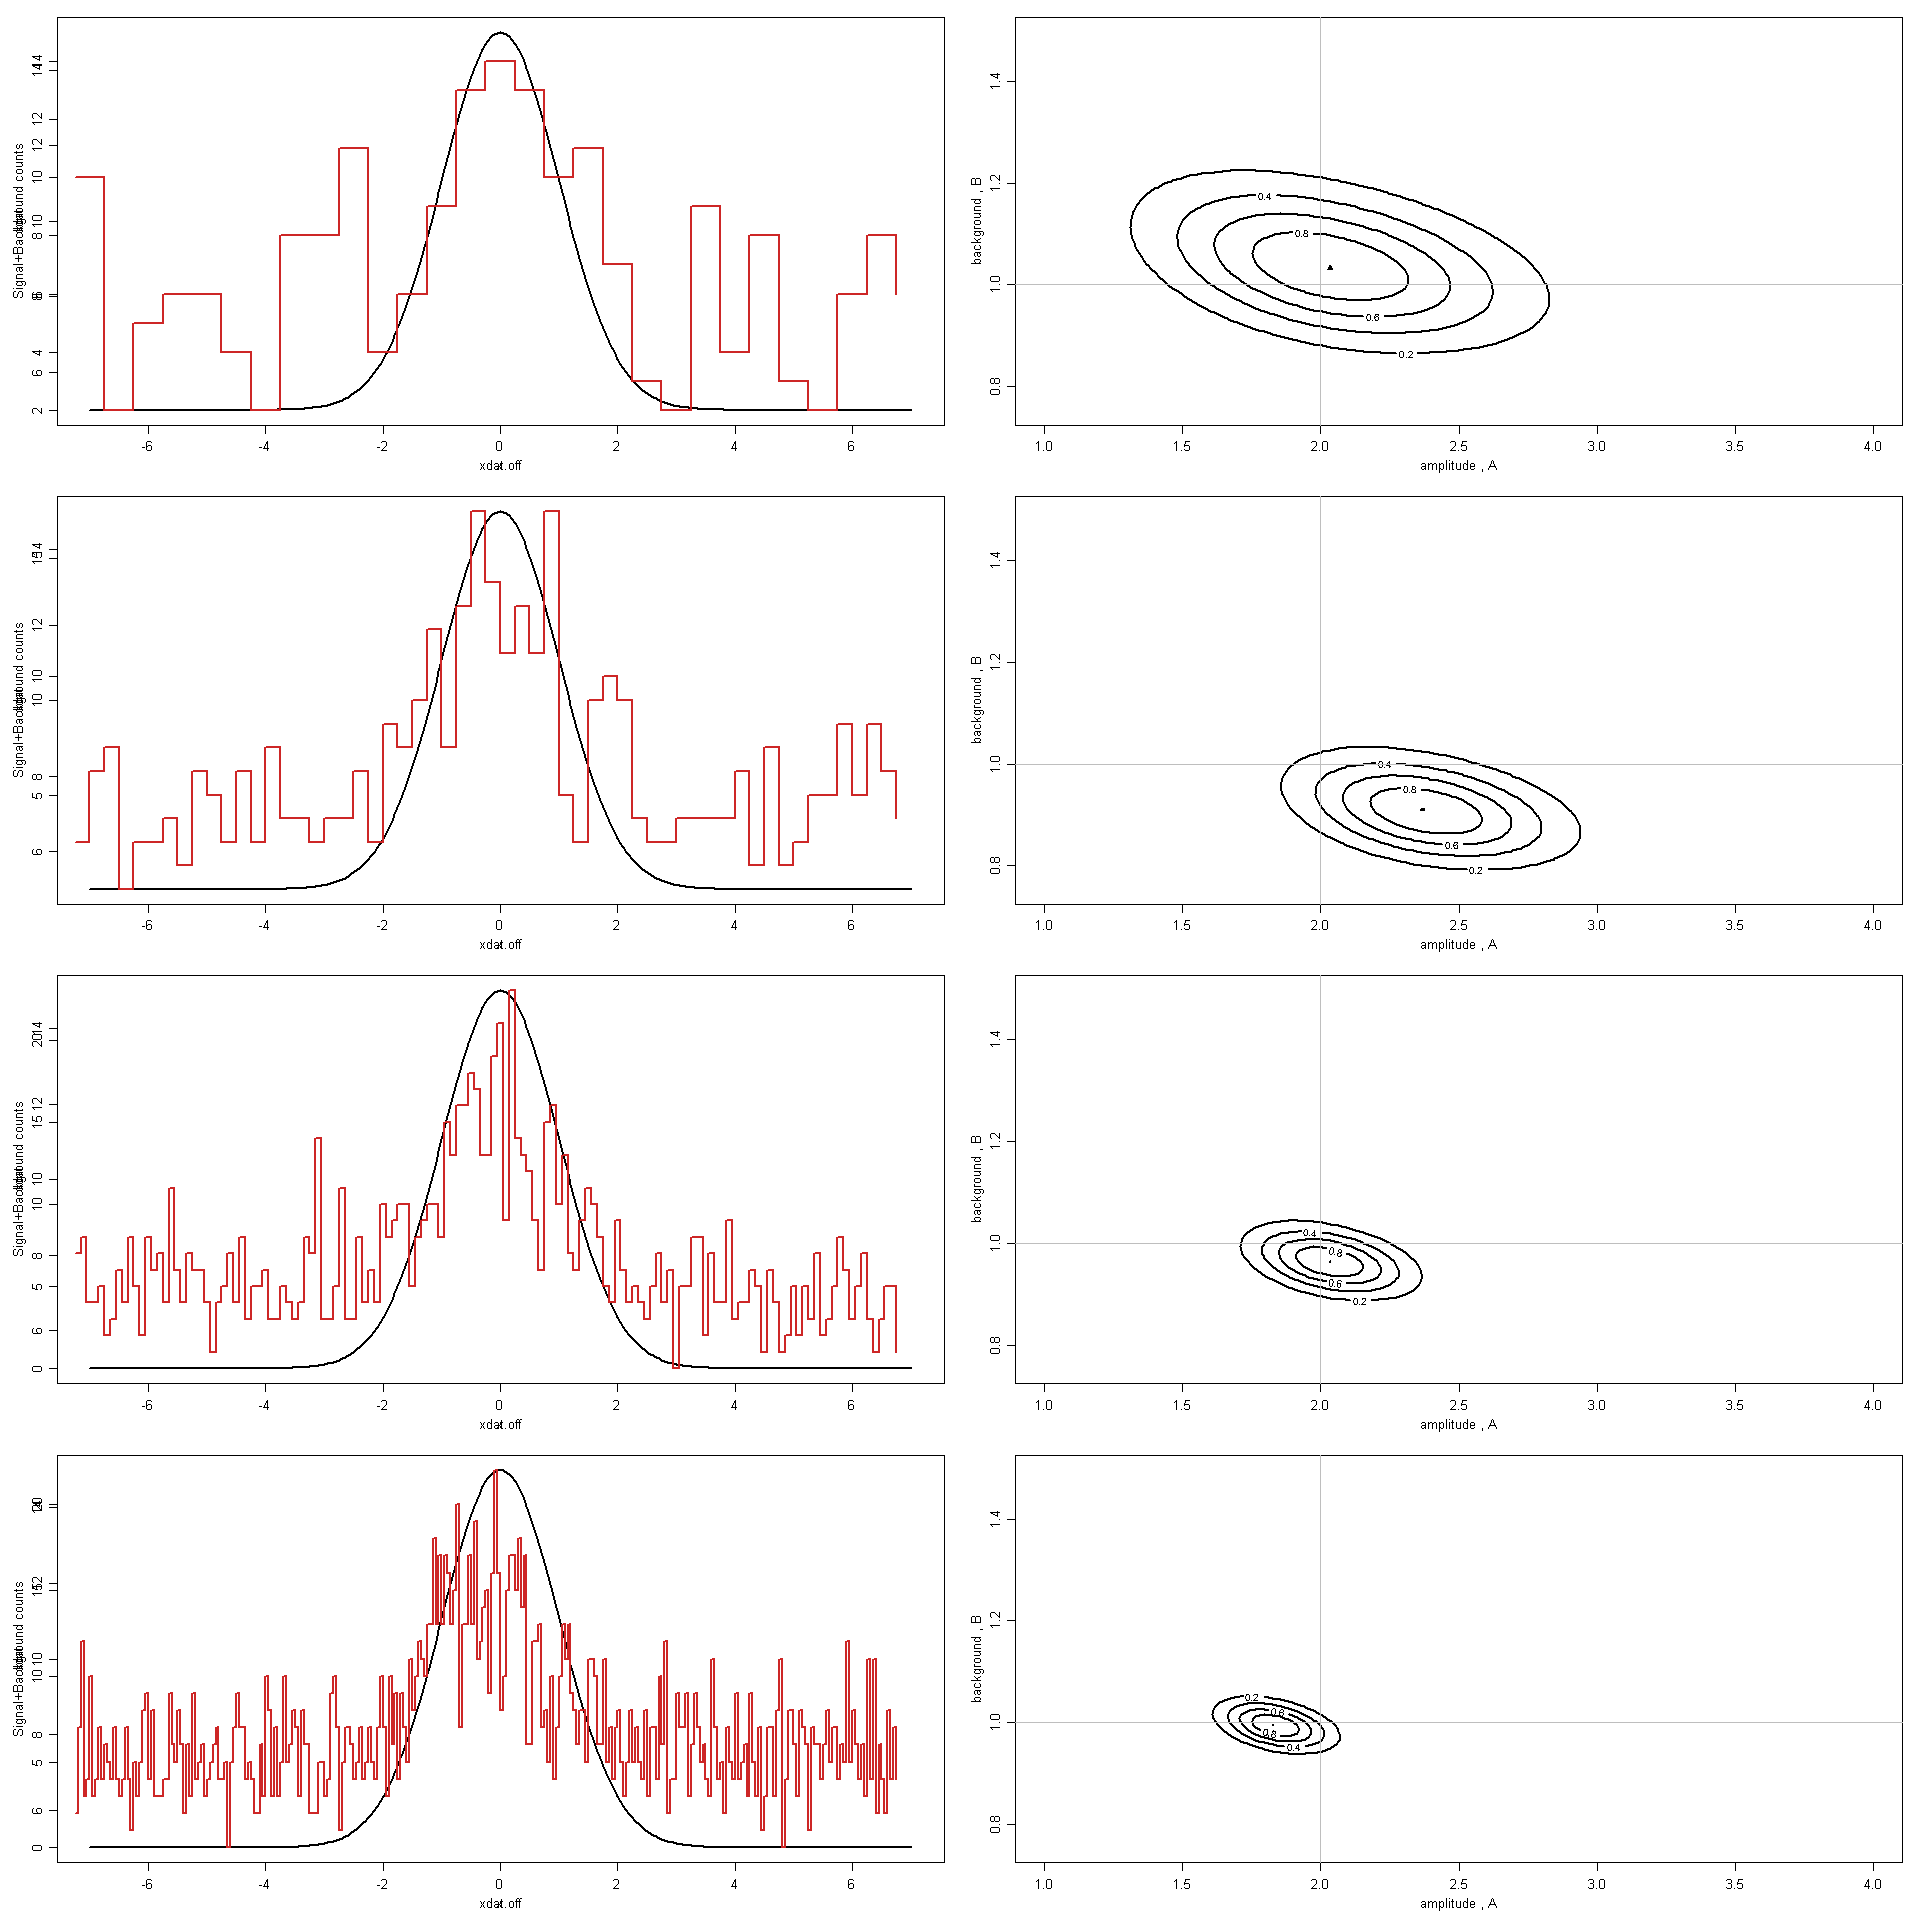

In [156]:
###Part A, variable resolution
# Define model parameters
x0 <- 0 # Signal peak
w <-1 # Signal width
## Dynamic resolution:part A
res <- c(1,2,5,10)

A.true <- 2 # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(205)
options(repr.plot.width=16, repr.plot.height=16)
par(mfrow=c(4,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
for (re in res){
xdat <- seq(from=-7*w, to=7*w, by=0.5*w*(1/re))
binplots(xdat,A.true,B.true,n,x0,w,Delta.t,re)
contourplot(xdat,A.true,B.true,n,x0,w,Delta.t,re)
    
}


## Part B Solution

With the change in the Amplitud of the signal, the noise carries a greater part of the energy of it

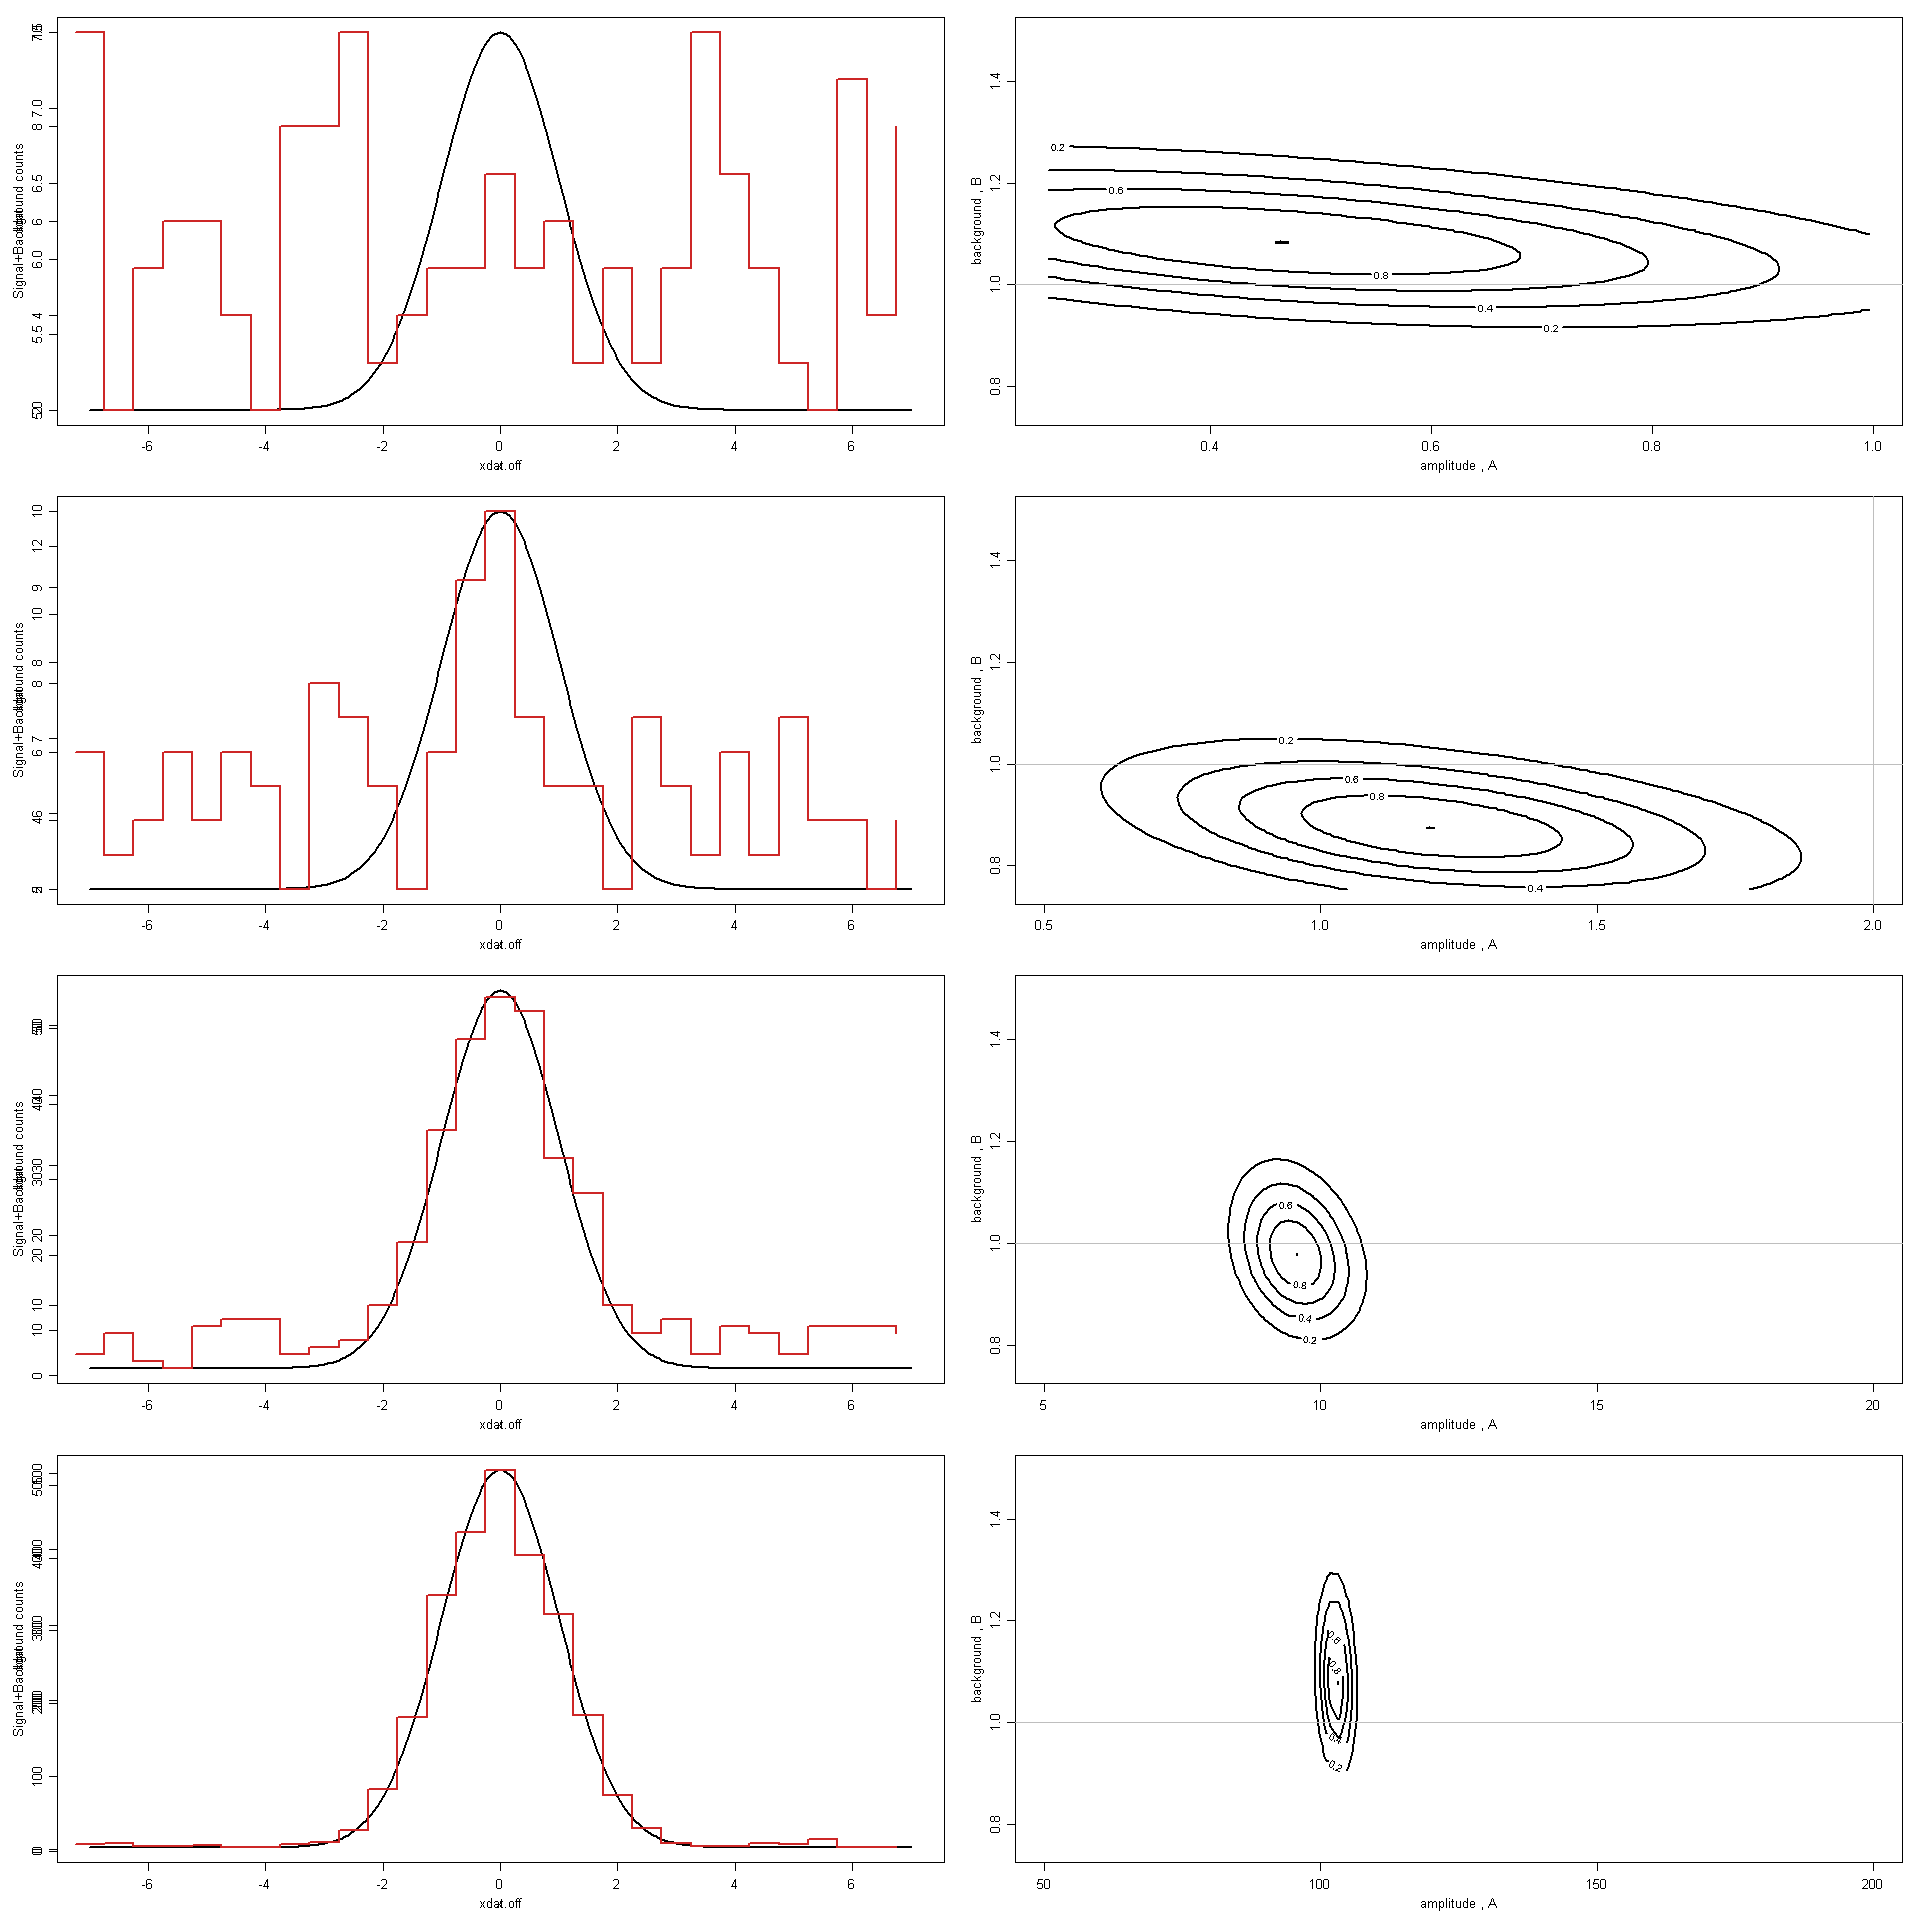

In [158]:
## Now for part B we need the same setup but varying the A Parameter

x0 <- 0 # Signal peak
w <-1 # Signal width

res <- 1

## Dynamic amplitude:part B
A.true <- c(0.5,1,10,100) # Signal amplitude
B.true <- 1 # Background amplitude
Delta.t <- 5 # Exposure time
# - Generate the observed data
set.seed(205)
options(repr.plot.width=16, repr.plot.height=16)
par(mfrow=c(4,2), mgp=c(2,0.8,0), mar=c(3.5,3.5,1,1), oma=0.1*c(1,1,1,1))
for (A in A.true){
xdat <- seq(from=-7*w, to=7*w, by=0.5*w*(1/res))
binplots(xdat,A,B.true,n,x0,w,Delta.t,res)
contourplot(xdat,A,B.true,n,x0,w,Delta.t,res)
    
}